In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
xtest=pd.read_csv('test_x.csv')
xtrain=pd.read_csv('train_x.csv')
ytrain=pd.read_csv("train_y.csv")
xtest.head()

,ID_Test,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1780.356350,16691.51975,B,X,1,0.348808,226.896383,12.506668,607.396052,3440.172169
1,2,1939.547945,14782.20015,A,Z,0,0.426270,125.046903,12.976712,599.808710,3517.084962
2,3,1721.876977,14035.40923,B,Z,0,0.097577,181.636946,5.501962,596.344664,3411.918090
3,4,1681.268538,15179.79116,A,Z,0,0.295460,151.320572,3.058352,597.761361,3392.298282
4,5,1654.495928,15187.09603,A,Y,0,0.272479,178.429450,4.571414,600.006307,3379.363201


In [3]:
xtrain.head()

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1830.943788,14767.28013,B,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2,1645.302546,15272.26775,B,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3,1555.026392,17482.49734,A,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,4,NaN,16257.66493,A,Y,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,5,1777.648916,16316.29914,B,X,1.0,NaN,224.074728,11.218489,605.947340,3438.864083


In [4]:
ytrain.head()

,ID,Label
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0


In [5]:
xtrain.describe()

,ID,Expense,Income,Age,Score1,Score2,Score3,Score4,Score5
count,80000.000000,77956.000000,78045.000000,77986.000000,78060.000000,77964.000000,78045.000000,78028.000000,78002.000000
mean,40000.500000,1733.993769,15641.112448,0.441105,0.187617,192.065584,9.365450,600.397742,3417.740403
std,23094.155105,133.239147,1065.620737,0.496522,0.123509,28.558250,8.760134,3.826112,64.391844
min,1.000000,1126.809192,11171.703240,0.000000,-0.563328,40.572797,-28.885235,581.806404,3124.413430
25%,20000.750000,1644.263974,14925.658150,0.000000,0.112651,173.415940,3.514901,597.894759,3374.406833
50%,40000.500000,1736.276720,15624.259290,0.000000,0.189877,191.056193,8.883862,600.095436,3418.793524
75%,60000.250000,1824.376793,16346.084990,1.000000,0.265243,209.727593,14.746607,602.597131,3461.384283
max,80000.000000,2309.129903,20728.915330,1.000000,0.705737,338.073551,50.691479,619.623108,3692.731924


In [6]:
xtest.describe()

,ID_Test,Expense,Income,Age,Score1,Score2,Score3,Score4,Score5
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,1805.659012,16292.496556,0.540200,0.139015,198.637069,7.943363,599.323923,3452.397051
std,5773.647028,114.050179,1216.819059,0.498394,0.174781,23.880580,8.857577,2.907165,55.102895
min,1.000000,1275.554664,11555.730030,0.000000,-0.723647,78.179536,-27.187032,585.796609,3196.279220
25%,5000.750000,1744.601926,15456.017288,0.000000,0.033070,183.295493,2.166709,597.444682,3422.897559
50%,10000.500000,1816.760668,16279.229190,1.000000,0.150738,196.936650,7.728437,599.129087,3457.760772
75%,15000.250000,1875.249917,17117.187057,1.000000,0.254006,213.197621,13.580003,600.950579,3486.019623
max,20000.000000,2252.020731,21250.232290,1.000000,0.802989,319.085535,45.817999,617.490932,3668.054960


In [7]:
ytrain.describe()

,ID,Label
count,80000.000000,76097.000000
mean,40000.500000,0.066139
std,23094.155105,0.248527
min,1.000000,0.000000
25%,20000.750000,0.000000
50%,40000.500000,0.000000
75%,60000.250000,0.000000
max,80000.000000,1.000000


In [8]:
ytrain.groupby('Label').size()

Label
0.0    71064
1.0     5033
dtype: int64

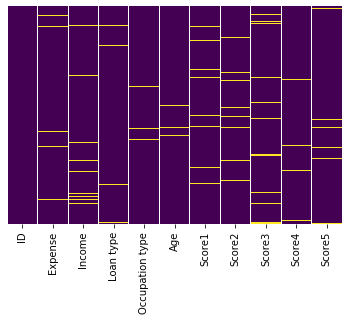

In [9]:
sns.heatmap(xtrain.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
#how to handle missing data
#conda install scikitlearn
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="mean")
imputer=imputer.fit(xtrain[['Expense', 'Income','Score1', 'Score2', 'Score3', 'Score4', 'Score5']])
xtrain[['Expense', 'Income','Score1', 'Score2', 'Score3', 'Score4', 'Score5']]=imputer.transform(xtrain[['Expense', 'Income','Score1', 'Score2', 'Score3', 'Score4', 'Score5']])

In [11]:
xtrain.head(15)

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1830.943788,14767.28013,B,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2,1645.302546,15272.26775,B,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3,1555.026392,17482.49734,A,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,4,1733.993769,16257.66493,A,Y,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,5,1777.648916,16316.29914,B,X,1.0,0.187617,224.074728,11.218489,605.947340,3438.864083
5,6,1523.124500,16622.93724,B,Y,1.0,0.369899,204.834959,-3.645561,602.787598,3315.891612
6,7,1560.817726,15917.47219,A,Z,0.0,0.104027,169.320992,-3.235722,594.224070,3334.102946
7,8,1713.508753,13528.79379,A,Z,0.0,0.297326,149.138845,5.000398,597.663724,3407.875016
8,9,1648.118401,14199.98019,B,Y,0.0,0.118299,190.691595,13.500508,600.088779,3376.281924
9,10,1770.176775,15899.76492,B,NaN,1.0,0.069068,202.016131,8.326076,598.336662,3435.253948


In [12]:
xtrain["Occupation type"].unique()

array(['Y', 'X', 'Z', nan], dtype=object)

In [13]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer=imputer.fit(xtrain[["Loan type","Occupation type","Age"]])
#imputer2=imputer.fit(ytrain[["Label"]])
xtrain[["Loan type","Occupation type","Age"]]=imputer.transform(xtrain[["Loan type","Occupation type","Age"]])
#ytrain[["Label"]]=imputer2.transform(ytrain[["Label"]])

In [14]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")
imputer=imputer.fit(ytrain[["Label"]])
ytrain[["Label"]]=imputer.transform(ytrain[["Label"]])

In [15]:
xtrain.head(15)

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1830.943788,14767.28013,B,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2,1645.302546,15272.26775,B,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3,1555.026392,17482.49734,A,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,4,1733.993769,16257.66493,A,Y,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,5,1777.648916,16316.29914,B,X,1.0,0.187617,224.074728,11.218489,605.947340,3438.864083
5,6,1523.124500,16622.93724,B,Y,1.0,0.369899,204.834959,-3.645561,602.787598,3315.891612
6,7,1560.817726,15917.47219,A,Z,0.0,0.104027,169.320992,-3.235722,594.224070,3334.102946
7,8,1713.508753,13528.79379,A,Z,0.0,0.297326,149.138845,5.000398,597.663724,3407.875016
8,9,1648.118401,14199.98019,B,Y,0.0,0.118299,190.691595,13.500508,600.088779,3376.281924
9,10,1770.176775,15899.76492,B,Y,1.0,0.069068,202.016131,8.326076,598.336662,3435.253948


In [16]:
ytrain


,ID,Label
0,1,0.0
1,2,0.0
2,3,0.0
3,4,0.0
4,5,0.0
...,...,...
79995,79996,0.0
79996,79997,0.0
79997,79998,0.0
79998,79999,0.0


In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
xtrain["Loan type"]=le.fit_transform(xtrain["Loan type"])



In [18]:
xtrain

,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1830.943788,14767.28013,1,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2,1645.302546,15272.26775,1,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3,1555.026392,17482.49734,0,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,4,1733.993769,16257.66493,0,Y,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,5,1777.648916,16316.29914,1,X,1.0,0.187617,224.074728,11.218489,605.947340,3438.864083
...,...,...,...,...,...,...,...,...,...,...,...
79995,79996,1470.317116,16659.49663,0,Y,0.0,0.208757,172.526308,-5.332184,596.648261,3290.377932
79996,79997,1923.617480,14910.36890,1,Y,0.0,0.201837,186.252458,15.425841,600.855069,3509.388221
79997,79998,1711.147154,15962.25945,0,Y,1.0,0.226396,196.098150,8.161353,601.360722,3406.734018
79998,79999,1673.822523,15525.27413,1,Z,0.0,0.101090,186.390184,3.381393,596.750750,3388.700770


In [19]:
train_x=pd.get_dummies(xtrain["Occupation type"],drop_first=True)

In [20]:
train_x

,Y,Z
0,1,0
1,1,0
2,1,0
3,1,0
4,0,0
...,...,...
79995,1,0
79996,1,0
79997,1,0
79998,0,1


In [21]:
xtrain=pd.concat([train_x,xtrain],axis=1)

In [22]:
xtrain

,Y,Z,ID,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,0,1,1830.943788,14767.28013,1,Y,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,1,0,2,1645.302546,15272.26775,1,Y,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,1,0,3,1555.026392,17482.49734,0,Y,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,1,0,4,1733.993769,16257.66493,0,Y,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,0,0,5,1777.648916,16316.29914,1,X,1.0,0.187617,224.074728,11.218489,605.947340,3438.864083
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,1,0,79996,1470.317116,16659.49663,0,Y,0.0,0.208757,172.526308,-5.332184,596.648261,3290.377932
79996,1,0,79997,1923.617480,14910.36890,1,Y,0.0,0.201837,186.252458,15.425841,600.855069,3509.388221
79997,1,0,79998,1711.147154,15962.25945,0,Y,1.0,0.226396,196.098150,8.161353,601.360722,3406.734018
79998,0,1,79999,1673.822523,15525.27413,1,Z,0.0,0.101090,186.390184,3.381393,596.750750,3388.700770


In [23]:
xtrain.drop("Occupation type",axis=1,inplace=True)

In [24]:
xtrain.head()

,Y,Z,ID,Expense,Income,Loan type,Age,Score1,Score2,Score3,Score4,Score5
0,1,0,1,1830.943788,14767.28013,1,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,1,0,2,1645.302546,15272.26775,1,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,1,0,3,1555.026392,17482.49734,0,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,1,0,4,1733.993769,16257.66493,0,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,0,0,5,1777.648916,16316.29914,1,1.0,0.187617,224.074728,11.218489,605.947340,3438.864083


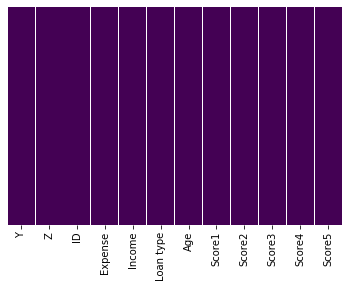

In [25]:
sns.heatmap(xtrain.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [26]:
x=xtrain[["ID","Expense","Income","Loan type","Y","Z","Age","Score1","Score2","Score3","Score4","Score5"]]
y=ytrain[["Label"]]

In [27]:
# split the data into train set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0)
x_train

,ID,Expense,Income,Loan type,Y,Z,Age,Score1,Score2,Score3,Score4,Score5
26115,26116,1599.684340,17065.52308,0,1,0,1.0,0.401602,200.640414,-1.120416,603.539753,3352.881198
37334,37335,1729.609325,16625.35468,0,1,0,0.0,0.173100,194.539602,7.094905,599.891263,3415.653944
30532,30533,1722.839176,13959.94843,0,0,1,0.0,0.270238,151.637609,5.029984,597.358924,3412.382973
67746,67747,1729.332883,14285.65472,0,0,1,0.0,0.192543,167.729187,5.650340,597.252220,3415.520382
48308,48309,1899.888807,14549.96714,0,1,0,0.0,-0.011830,177.591179,26.780329,598.909797,3417.740403
...,...,...,...,...,...,...,...,...,...,...,...,...
21243,21244,1733.993769,17241.43218,0,1,0,1.0,0.014445,199.603050,17.586248,599.294243,3492.972487
45891,45892,1860.597073,14614.32582,0,0,0,1.0,0.006913,195.405442,25.333945,600.525126,3478.940159
42613,42614,1630.722915,14367.40662,1,0,1,0.0,0.012652,186.914017,0.883509,594.230816,3367.877363
43567,43568,1887.140855,18532.92943,1,0,1,0.0,0.300989,193.802420,-13.072048,596.572918,3417.740403


In [28]:
x_test.shape

(16000, 12)

In [29]:
x_train.shape

(64000, 12)

In [30]:
y_test

,Label
7389,0.0
3509,0.0
30661,0.0
63191,0.0
38241,0.0
...,...
63264,0.0
3491,0.0
67642,0.0
59840,0.0


In [31]:
#feature scaling the data
# to obtain better accuracy using ml algorithm we need to have all the features in the specified range..
# normalisation here using the gaussian distribution
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train


array([[-5.97197021e-01, -1.01683658e+00,  1.34998259e+00, ...,
        -1.21222586e+00,  8.30624776e-01, -1.01606802e+00],
       [-1.11480976e-01, -3.07245100e-02,  9.31927709e-01, ...,
        -2.61428432e-01, -1.34033540e-01, -3.06670417e-02],
       [-4.05967164e-01, -8.21089736e-02, -1.59957183e+00, ...,
        -5.00411326e-01, -8.03582428e-01, -8.20144532e-02],
       ...,
       [ 1.17068361e-01, -7.81258234e-01, -1.21258384e+00, ...,
        -9.80302246e-01, -1.63065222e+00, -7.80659556e-01],
       [ 1.58370893e-01,  1.16491730e+00,  2.74366827e+00, ...,
        -2.59544404e+00, -1.01140197e+00,  2.08600649e-03],
       [ 1.22777744e+00, -8.47741504e-01,  1.20550324e+00, ...,
        -1.12144212e+00,  1.77585445e+00, -8.47094873e-01]])

In [32]:
x_train.shape

(64000, 12)

In [33]:
# from sklearn.family import class # create an object using this class
# fitting the logistic regression to the trainig set
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver="lbfgs")
classifier.fit(x_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [34]:
# predicting the test set results
y_predict=classifier.predict(x_test)
print(y_predict)

[0. 0. 0. ... 0. 0. 0.]


In [35]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14908    79]
 [  574   439]]

Accuracy: 95.92


In [36]:
# fitting the KNeighborsClassifier to training data
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [38]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14904    83]
 [  255   758]]

Accuracy: 97.89


In [39]:
# fitting the svc trainig data
from sklearn.svm import SVC
classifier=SVC(kernel="linear",random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [40]:
 # predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14956    31]
 [  655   358]]

Accuracy: 95.71


In [42]:
# fitting the svc trainig data
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [43]:
 # predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14925    62]
 [  282   731]]

Accuracy: 97.85


In [45]:
# fitting the decision tress classifier to data
from sklearn.tree import DecisionTreeClassifier
classifier= DecisionTreeClassifier(criterion="entropy",random_state=0)  # by default criterion is "gini"
classifier.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [46]:
# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [47]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14714   273]
 [  262   751]]

Accuracy: 96.66


In [48]:
# fitting the random forest clasifier to the data
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=10,criterion="gini",random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [49]:
## predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14913    74]
 [  270   743]]

Accuracy: 97.85


In [51]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier=GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [52]:
# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14923    64]
 [  573   440]]

Accuracy: 96.02


## feature selection

In [54]:
x=xtrain[["ID","Expense","Income","Loan type","Y","Z","Age","Score1","Score2","Score3","Score4","Score5"]]
y=ytrain[["Label"]]

In [55]:
x

,ID,Expense,Income,Loan type,Y,Z,Age,Score1,Score2,Score3,Score4,Score5
0,1,1830.943788,14767.28013,1,1,0,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2,1645.302546,15272.26775,1,1,0,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3,1555.026392,17482.49734,0,1,0,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,4,1733.993769,16257.66493,0,1,0,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,5,1777.648916,16316.29914,1,0,0,1.0,0.187617,224.074728,11.218489,605.947340,3438.864083
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79996,1470.317116,16659.49663,0,1,0,0.0,0.208757,172.526308,-5.332184,596.648261,3290.377932
79996,79997,1923.617480,14910.36890,1,1,0,0.0,0.201837,186.252458,15.425841,600.855069,3509.388221
79997,79998,1711.147154,15962.25945,0,1,0,1.0,0.226396,196.098150,8.161353,601.360722,3406.734018
79998,79999,1673.822523,15525.27413,1,0,1,0.0,0.101090,186.390184,3.381393,596.750750,3388.700770


In [56]:
y

,Label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
79995,0.0
79996,0.0
79997,0.0
79998,0.0


# Univariate selection

In [57]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
X=x[:]
Y=y[:]

In [58]:
X

,ID,Expense,Income,Loan type,Y,Z,Age,Score1,Score2,Score3,Score4,Score5
0,1,1830.943788,14767.28013,1,1,0,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2,1645.302546,15272.26775,1,1,0,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3,1555.026392,17482.49734,0,1,0,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,4,1733.993769,16257.66493,0,1,0,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,5,1777.648916,16316.29914,1,0,0,1.0,0.187617,224.074728,11.218489,605.947340,3438.864083
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79996,1470.317116,16659.49663,0,1,0,0.0,0.208757,172.526308,-5.332184,596.648261,3290.377932
79996,79997,1923.617480,14910.36890,1,1,0,0.0,0.201837,186.252458,15.425841,600.855069,3509.388221
79997,79998,1711.147154,15962.25945,0,1,0,1.0,0.226396,196.098150,8.161353,601.360722,3406.734018
79998,79999,1673.822523,15525.27413,1,0,1,0.0,0.101090,186.390184,3.381393,596.750750,3388.700770


In [59]:
Y

,Label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
79995,0.0
79996,0.0
79997,0.0
79998,0.0


In [60]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_classif, k=6)
fit = bestfeatures.fit(X,Y)

In [61]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [62]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Species','Scores']  #naming the dataframe columns

In [63]:
featureScores

,Species,Scores
0,ID,2.722196
1,Expense,2908.387304
2,Income,3719.147002
3,Loan type,665.945897
4,Y,3.241562
5,Z,294.229013
6,Age,393.509012
7,Score1,1469.917741
8,Score2,525.729914
9,Score3,263.827763


In [64]:
print(featureScores.nlargest(7,'Scores')) 

      Species       Scores
2      Income  3719.147002
1     Expense  2908.387304
11     Score5  2889.807629
7      Score1  1469.917741
10     Score4   753.029506
3   Loan type   665.945897
8      Score2   525.729914


# feature importance

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [66]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.03901237 0.1247408  0.15104643 0.0271292  0.0159714  0.04764988
 0.02505349 0.15342988 0.06598851 0.13777341 0.08992961 0.12227503]


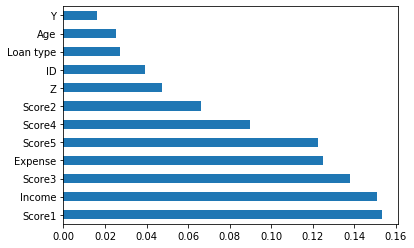

In [67]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

In [68]:
data=pd.concat([X,Y],axis=1)
data

,ID,Expense,Income,Loan type,Y,Z,Age,Score1,Score2,Score3,Score4,Score5,Label
0,1,1830.943788,14767.28013,1,1,0,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291,0.0
1,2,1645.302546,15272.26775,1,1,0,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455,0.0
2,3,1555.026392,17482.49734,0,1,0,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886,0.0
3,4,1733.993769,16257.66493,0,1,0,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849,0.0
4,5,1777.648916,16316.29914,1,0,0,1.0,0.187617,224.074728,11.218489,605.947340,3438.864083,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79996,1470.317116,16659.49663,0,1,0,0.0,0.208757,172.526308,-5.332184,596.648261,3290.377932,0.0
79996,79997,1923.617480,14910.36890,1,1,0,0.0,0.201837,186.252458,15.425841,600.855069,3509.388221,0.0
79997,79998,1711.147154,15962.25945,0,1,0,1.0,0.226396,196.098150,8.161353,601.360722,3406.734018,0.0
79998,79999,1673.822523,15525.27413,1,0,1,0.0,0.101090,186.390184,3.381393,596.750750,3388.700770,0.0


# Correlation Matrix with Heatmap

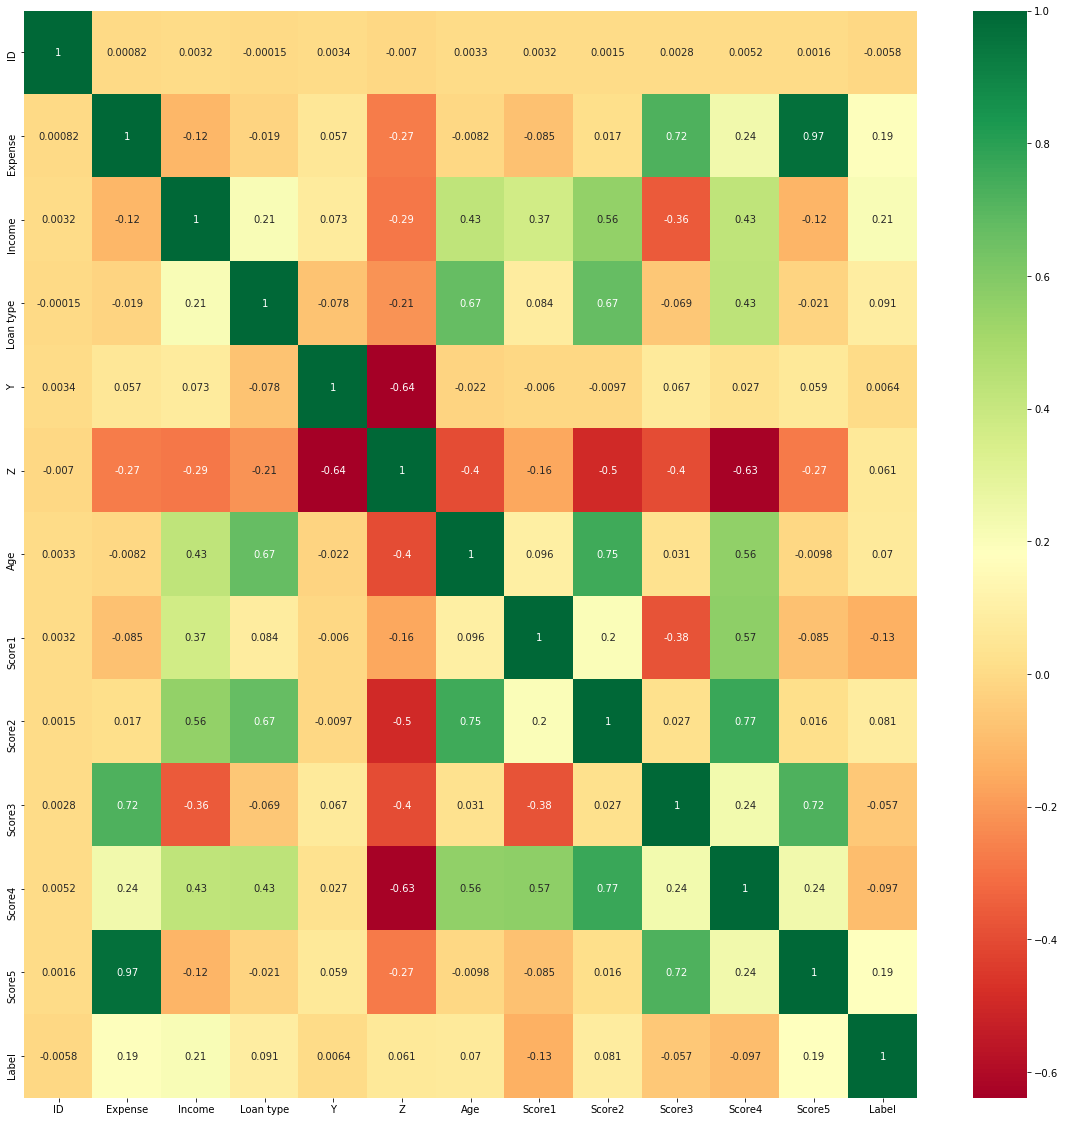

In [69]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

# checking the accuracy after feature selection

In [70]:
featured_X=X[["Income","Expense","Score1","Score2","Loan type","Score4","Score5","Score3"]]
featured_Y=Y[["Label"]]
featured_X

,Income,Expense,Score1,Score2,Loan type,Score4,Score5,Score3
0,14767.28013,1830.943788,0.016885,205.196182,1,600.911200,3464.613291,22.521523
1,15272.26775,1645.302546,0.240375,194.266317,1,600.888816,3374.921455,5.349117
2,17482.49734,1555.026392,0.213921,183.529871,0,598.596944,3331.304886,-1.054954
3,16257.66493,1733.993769,0.303909,191.228965,0,602.447203,3392.275849,6.971750
4,16316.29914,1777.648916,0.187617,224.074728,1,605.947340,3438.864083,11.218489
...,...,...,...,...,...,...,...,...
79995,16659.49663,1470.317116,0.208757,172.526308,0,596.648261,3290.377932,-5.332184
79996,14910.36890,1923.617480,0.201837,186.252458,1,600.855069,3509.388221,15.425841
79997,15962.25945,1711.147154,0.226396,196.098150,0,601.360722,3406.734018,8.161353
79998,15525.27413,1673.822523,0.101090,186.390184,1,596.750750,3388.700770,3.381393


In [71]:
# split the data into train set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(featured_X,featured_Y,test_size=0.20,random_state=0)
x_train

,Income,Expense,Score1,Score2,Loan type,Score4,Score5,Score3
26115,17065.52308,1599.684340,0.401602,200.640414,0,603.539753,3352.881198,-1.120416
37334,16625.35468,1729.609325,0.173100,194.539602,0,599.891263,3415.653944,7.094905
30532,13959.94843,1722.839176,0.270238,151.637609,0,597.358924,3412.382973,5.029984
67746,14285.65472,1729.332883,0.192543,167.729187,0,597.252220,3415.520382,5.650340
48308,14549.96714,1899.888807,-0.011830,177.591179,0,598.909797,3417.740403,26.780329
...,...,...,...,...,...,...,...,...
21243,17241.43218,1733.993769,0.014445,199.603050,0,599.294243,3492.972487,17.586248
45891,14614.32582,1860.597073,0.006913,195.405442,0,600.525126,3478.940159,25.333945
42613,14367.40662,1630.722915,0.012652,186.914017,1,594.230816,3367.877363,0.883509
43567,18532.92943,1887.140855,0.300989,193.802420,1,596.572918,3417.740403,-13.072048


In [72]:
#feature scaling the data
# to obtain better accuracy using ml algorithm we need to have all the features in the specified range..
# normalisation here using the gaussian distribution
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
x_train


array([[ 1.34998259e+00, -1.01683658e+00,  1.75299047e+00, ...,
         8.30624776e-01, -1.01606802e+00, -1.21222586e+00],
       [ 9.31927709e-01, -3.07245100e-02, -1.18916256e-01, ...,
        -1.34033540e-01, -3.06670417e-02, -2.61428432e-01],
       [-1.59957183e+00, -8.21089736e-02,  6.76845337e-01, ...,
        -8.03582428e-01, -8.20144532e-02, -5.00411326e-01],
       ...,
       [-1.21258384e+00, -7.81258234e-01, -1.43331479e+00, ...,
        -1.63065222e+00, -7.80659556e-01, -9.80302246e-01],
       [ 2.74366827e+00,  1.16491730e+00,  9.28756964e-01, ...,
        -1.01140197e+00,  2.08600649e-03, -2.59544404e+00],
       [ 1.20550324e+00, -8.47741504e-01,  1.64549694e+00, ...,
         1.77585445e+00, -8.47094873e-01, -1.12144212e+00]])

In [73]:
# fitting the KNeighborsClassifier to training data
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [74]:
# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14903    84]
 [  204   809]]

Accuracy: 98.20


In [76]:
# fitting the svc trainig data
from sklearn.svm import SVC
classifier=SVC(kernel="rbf",random_state=0)
classifier.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [77]:
# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14922    65]
 [  258   755]]

Accuracy: 97.98


In [79]:
# fitting the random forest clasifier to the data
from sklearn.ensemble import RandomForestClassifier
classifier= RandomForestClassifier(n_estimators=10,criterion="gini",random_state=0)
classifier.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [80]:
# predicting the test set results
y_predict=classifier.predict(x_test)
y_predict

array([0., 0., 0., ..., 0., 0., 0.])

In [81]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_predict)
accuracy=accuracy_score(y_test,y_predict)
print(cm)
print()
print("Accuracy: %.2f" % (accuracy*100))

[[14910    77]
 [  237   776]]

Accuracy: 98.04


# predictions onthe test_x

In [82]:
import pandas as pd
data=pd.read_csv("test_x.csv")
data

,ID_Test,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1780.356350,16691.51975,B,X,1,0.348808,226.896383,12.506668,607.396052,3440.172169
1,2,1939.547945,14782.20015,A,Z,0,0.426270,125.046903,12.976712,599.808710,3517.084962
2,3,1721.876977,14035.40923,B,Z,0,0.097577,181.636946,5.501962,596.344664,3411.918090
3,4,1681.268538,15179.79116,A,Z,0,0.295460,151.320572,3.058352,597.761361,3392.298282
4,5,1654.495928,15187.09603,A,Y,0,0.272479,178.429450,4.571414,600.006307,3379.363201
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1706.038470,15388.07701,B,Z,0,0.080845,192.079189,1.100830,595.979156,3404.265778
19996,19997,1712.503287,17979.80449,B,X,1,-0.025641,228.686449,11.394893,600.071790,3407.389229
19997,19998,1873.089949,17804.74995,B,Y,1,0.068247,236.021469,4.680945,599.961820,3484.976043
19998,19999,1740.115898,17071.77542,B,X,1,0.032874,231.595185,12.147134,601.404096,3420.730153


In [83]:
train_x=X[:]
train_x

,ID,Expense,Income,Loan type,Y,Z,Age,Score1,Score2,Score3,Score4,Score5
0,1,1830.943788,14767.28013,1,1,0,1.0,0.016885,205.196182,22.521523,600.911200,3464.613291
1,2,1645.302546,15272.26775,1,1,0,0.0,0.240375,194.266317,5.349117,600.888816,3374.921455
2,3,1555.026392,17482.49734,0,1,0,0.0,0.213921,183.529871,-1.054954,598.596944,3331.304886
3,4,1733.993769,16257.66493,0,1,0,0.0,0.303909,191.228965,6.971750,602.447203,3392.275849
4,5,1777.648916,16316.29914,1,0,0,1.0,0.187617,224.074728,11.218489,605.947340,3438.864083
...,...,...,...,...,...,...,...,...,...,...,...,...
79995,79996,1470.317116,16659.49663,0,1,0,0.0,0.208757,172.526308,-5.332184,596.648261,3290.377932
79996,79997,1923.617480,14910.36890,1,1,0,0.0,0.201837,186.252458,15.425841,600.855069,3509.388221
79997,79998,1711.147154,15962.25945,0,1,0,1.0,0.226396,196.098150,8.161353,601.360722,3406.734018
79998,79999,1673.822523,15525.27413,1,0,1,0.0,0.101090,186.390184,3.381393,596.750750,3388.700770


In [84]:
train_y=Y[:]
train_y

,Label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
79995,0.0
79996,0.0
79997,0.0
79998,0.0


In [85]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data["Loan type"]=le.fit_transform(data["Loan type"])
data

,ID_Test,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,1,1780.356350,16691.51975,1,X,1,0.348808,226.896383,12.506668,607.396052,3440.172169
1,2,1939.547945,14782.20015,0,Z,0,0.426270,125.046903,12.976712,599.808710,3517.084962
2,3,1721.876977,14035.40923,1,Z,0,0.097577,181.636946,5.501962,596.344664,3411.918090
3,4,1681.268538,15179.79116,0,Z,0,0.295460,151.320572,3.058352,597.761361,3392.298282
4,5,1654.495928,15187.09603,0,Y,0,0.272479,178.429450,4.571414,600.006307,3379.363201
...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1706.038470,15388.07701,1,Z,0,0.080845,192.079189,1.100830,595.979156,3404.265778
19996,19997,1712.503287,17979.80449,1,X,1,-0.025641,228.686449,11.394893,600.071790,3407.389229
19997,19998,1873.089949,17804.74995,1,Y,1,0.068247,236.021469,4.680945,599.961820,3484.976043
19998,19999,1740.115898,17071.77542,1,X,1,0.032874,231.595185,12.147134,601.404096,3420.730153


In [86]:
xtest=pd.get_dummies(data["Occupation type"],drop_first=True)
xtest

,Y,Z
0,0,0
1,0,1
2,0,1
3,0,1
4,1,0
...,...,...
19995,0,1
19996,0,0
19997,1,0
19998,0,0


In [87]:
test_x=pd.concat([xtest,data],axis=1)
test_x

,Y,Z,ID_Test,Expense,Income,Loan type,Occupation type,Age,Score1,Score2,Score3,Score4,Score5
0,0,0,1,1780.356350,16691.51975,1,X,1,0.348808,226.896383,12.506668,607.396052,3440.172169
1,0,1,2,1939.547945,14782.20015,0,Z,0,0.426270,125.046903,12.976712,599.808710,3517.084962
2,0,1,3,1721.876977,14035.40923,1,Z,0,0.097577,181.636946,5.501962,596.344664,3411.918090
3,0,1,4,1681.268538,15179.79116,0,Z,0,0.295460,151.320572,3.058352,597.761361,3392.298282
4,1,0,5,1654.495928,15187.09603,0,Y,0,0.272479,178.429450,4.571414,600.006307,3379.363201
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,19996,1706.038470,15388.07701,1,Z,0,0.080845,192.079189,1.100830,595.979156,3404.265778
19996,0,0,19997,1712.503287,17979.80449,1,X,1,-0.025641,228.686449,11.394893,600.071790,3407.389229
19997,1,0,19998,1873.089949,17804.74995,1,Y,1,0.068247,236.021469,4.680945,599.961820,3484.976043
19998,0,0,19999,1740.115898,17071.77542,1,X,1,0.032874,231.595185,12.147134,601.404096,3420.730153


In [88]:
test_x.drop("Occupation type",axis=1,inplace=True)
test_x

,Y,Z,ID_Test,Expense,Income,Loan type,Age,Score1,Score2,Score3,Score4,Score5
0,0,0,1,1780.356350,16691.51975,1,1,0.348808,226.896383,12.506668,607.396052,3440.172169
1,0,1,2,1939.547945,14782.20015,0,0,0.426270,125.046903,12.976712,599.808710,3517.084962
2,0,1,3,1721.876977,14035.40923,1,0,0.097577,181.636946,5.501962,596.344664,3411.918090
3,0,1,4,1681.268538,15179.79116,0,0,0.295460,151.320572,3.058352,597.761361,3392.298282
4,1,0,5,1654.495928,15187.09603,0,0,0.272479,178.429450,4.571414,600.006307,3379.363201
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,0,1,19996,1706.038470,15388.07701,1,0,0.080845,192.079189,1.100830,595.979156,3404.265778
19996,0,0,19997,1712.503287,17979.80449,1,1,-0.025641,228.686449,11.394893,600.071790,3407.389229
19997,1,0,19998,1873.089949,17804.74995,1,1,0.068247,236.021469,4.680945,599.961820,3484.976043
19998,0,0,19999,1740.115898,17071.77542,1,1,0.032874,231.595185,12.147134,601.404096,3420.730153


In [89]:
test_x=test_x[["ID_Test","Expense","Income","Loan type","Y","Z","Age","Score1","Score2","Score3","Score4","Score5"]]
test_x

,ID_Test,Expense,Income,Loan type,Y,Z,Age,Score1,Score2,Score3,Score4,Score5
0,1,1780.356350,16691.51975,1,0,0,1,0.348808,226.896383,12.506668,607.396052,3440.172169
1,2,1939.547945,14782.20015,0,0,1,0,0.426270,125.046903,12.976712,599.808710,3517.084962
2,3,1721.876977,14035.40923,1,0,1,0,0.097577,181.636946,5.501962,596.344664,3411.918090
3,4,1681.268538,15179.79116,0,0,1,0,0.295460,151.320572,3.058352,597.761361,3392.298282
4,5,1654.495928,15187.09603,0,1,0,0,0.272479,178.429450,4.571414,600.006307,3379.363201
...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19996,1706.038470,15388.07701,1,0,1,0,0.080845,192.079189,1.100830,595.979156,3404.265778
19996,19997,1712.503287,17979.80449,1,0,0,1,-0.025641,228.686449,11.394893,600.071790,3407.389229
19997,19998,1873.089949,17804.74995,1,1,0,1,0.068247,236.021469,4.680945,599.961820,3484.976043
19998,19999,1740.115898,17071.77542,1,0,0,1,0.032874,231.595185,12.147134,601.404096,3420.730153


In [90]:
# fitting the KNeighborsClassifier to training data
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [91]:
# predicting the test set results
pred_y=classifier.predict(test_x)
pred_y

array([0., 0., 0., ..., 1., 0., 0.])

In [92]:
test_x.shape

(20000, 12)

In [93]:
pred_y.shape

(20000,)

In [94]:
pred_y=pd.DataFrame(pred_y,columns=["Label"])
pred_y.to_csv('pred_y.csv',index=False)  # here we didnt export the index so the indexes are changed to default indexes
pred_y=pd.read_csv('pred_y.csv')
pred_y
                

,Label
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
19995,0.0
19996,0.0
19997,1.0
19998,0.0
